In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

notebook_path = os.getcwd()
weights_file_path=f"{notebook_path}/c01_training_and_testing_weights.npy"

In [3]:
# Datasets path
# usa-housing_data
csv_train_path = f"{notebook_path}/usa-housing_data/usa-housing-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/usa-housing_data/usa-housing-test-preprocessed.csv"

# simple_one_feature
# csv_train_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-train-preprocessed.csv"
# )
# csv_test_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-test-preprocessed.csv"
# )

In [4]:
def load_csv_as_augmented(csv_path):
    assert os.path.exists(csv_path), "File not exists, "+ csv_path
    df=pd.read_csv(csv_path)
    print(df.columns)
    d=np.array(df)[:,1:]
    x=d[:,:-1]
    x_aug=np.hstack((np.ones((x.shape[0],1)),x))
    y=d[:,-1]
    print(f"x_aug.shape: {x_aug.shape}, y.shape: {y.shape}")
    return x_aug,y

In [5]:
def multiple_linear_regression(x,w):
    y_hat=0
    for xi,wi in zip(x.T,w):
        y_hat+=xi*wi
    return y_hat

In [6]:
def fn_mae(y_hat,y):
    return np.mean(np.abs(y_hat-y))
def fn_mse(y_hat,y):
    return np.mean((y_hat-y)**2)
def fn_rmse(y_hat,y):
    return np.sqrt(fn_mse(y_hat,y))
def fn_r2(y_hat,y):
    r2=1-np.sum((y_hat-y)**2)/np.sum((y.mean()-y)**2)
    return r2

In [7]:
def use_grad_mse(x, y, y_hat, w, eta):
    # Not good
    # for i in range(w.shape[0]):
    #     # print(i)
    #     g = 2 * np.mean(x[:, i] * (y_hat - y))
    #     w[i] -= eta*g

    # Better
    grads = []
    for xi in x.T:
        grads.append(2 * np.mean(xi * (y_hat - y)))
    grads = np.array(grads)
    w -= eta * grads
    return w

In [8]:
def gradient_decent(x, y, eta, epochs):
    e_mae_list = []
    e_mse_list = []
    w = np.random.random(x.shape[1])
    for epoch in range(epochs):
        y_hat = multiple_linear_regression(x, w)

        e_mae = fn_mae(y_hat, y)
        e_mae_list.append(e_mae)

        e_mse = fn_mse(y_hat, y)
        e_mse_list.append(e_mse)

        if epoch % 100 == 0 or epoch < 10 or epoch > epochs - 10:
            print(f"epoch {epoch},\tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")

        # loss function MSE
        w = use_grad_mse(x, y, y_hat, w, eta)
    y_hat = multiple_linear_regression(x, w)
    e_mae = fn_mae(y_hat, y)
    e_mae_list.append(e_mae)

    e_mse = fn_mse(y_hat, y)
    e_mse_list.append(e_mse)

    print(f"Final    \tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")
    info = {
        "weights": w,  # Not necessary
        "last_e_mae": e_mae,
        "e_mae_list": e_mae_list,
        "last_e_mse": e_mse,
        "e_mse_list": e_mse_list,
    }
    return w, info

In [9]:
# load train data
print("train: ", end="\t")
x_aug_train, y_train = load_csv_as_augmented(csv_train_path)

train: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (3500, 6), y.shape: (3500,)


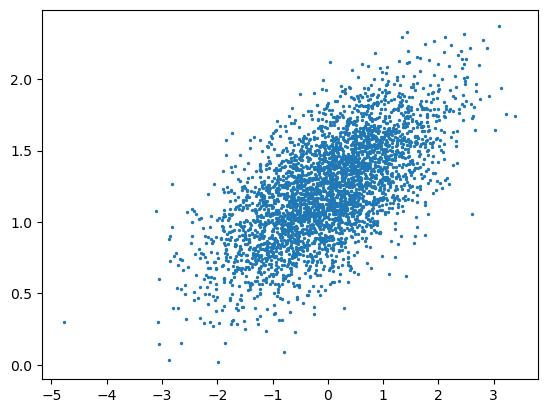

In [10]:
# Visualize
# plt.scatter(x_aug_train[:,0],y_train)
plt.scatter(x_aug_train[:, 1], y_train,s=2)
# plt.scatter(x_aug_train[:,2],y_train)
# ...

In [11]:
# For test
w = np.random.random(x_aug_train.shape[1])
y_hat_train_no_trained = multiple_linear_regression(x_aug_train, w)
print(f"y_hat_train_no_trained.shape: {y_hat_train_no_trained.shape}")
print(f"MAE: {fn_mae(y_hat_train_no_trained,y_train):.4f}")
print(f"MSE: {fn_mse(y_hat_train_no_trained,y_train):.4f}")

y_hat_train_no_trained.shape: (3500,)
MAE: 1.1386
MSE: 1.7412


In [12]:
# Training
epochs = 1000
eta = 0.005

weights, info = gradient_decent(x_aug_train, y_train, eta, epochs)
print(f"weights: {weights}")
print(f"Error MAE on train: {info["last_e_mae"]:.4f}")
print(f"Error MSE on train: {info["last_e_mse"]:.4f}")

# Save weights
np.save(weights_file_path,weights)
print(f"Weights saved in: {"c01_training_and_testing_weights.npy"} ")
# print(f"Weights saved in:{weights_file_path}")


epoch 0,	E_MAE:0.6440,	E_MSE:0.6414,	w:[0.84692932 0.72917739 0.12223209 0.35175728 0.31785945 0.18357283]
epoch 1,	E_MAE:0.6365,	E_MSE:0.6265,	w:[0.85077209 0.72401853 0.12260729 0.34796057 0.31354183 0.18334295]
epoch 2,	E_MAE:0.6290,	E_MSE:0.6121,	w:[0.85457645 0.71891334 0.12297907 0.34422223 0.30928586 0.18311423]
epoch 3,	E_MAE:0.6217,	E_MSE:0.5979,	w:[0.85834276 0.71386126 0.12334748 0.3405414  0.30509066 0.18288666]
epoch 4,	E_MAE:0.6144,	E_MSE:0.5842,	w:[0.86207142 0.70886172 0.12371255 0.33691721 0.30095534 0.18266026]
epoch 5,	E_MAE:0.6073,	E_MSE:0.5707,	w:[0.86576279 0.70391418 0.1240743  0.33334881 0.29687903 0.18243502]
epoch 6,	E_MAE:0.6002,	E_MSE:0.5576,	w:[0.86941726 0.69901809 0.12443278 0.32983537 0.29286088 0.18221094]
epoch 7,	E_MAE:0.5932,	E_MSE:0.5448,	w:[0.87303518 0.69417292 0.124788   0.32637605 0.28890005 0.18198804]
epoch 8,	E_MAE:0.5864,	E_MSE:0.5323,	w:[0.87661693 0.68937812 0.12514    0.32297005 0.28499569 0.1817663 ]
epoch 9,	E_MAE:0.5796,	E_MSE:0.5201,	

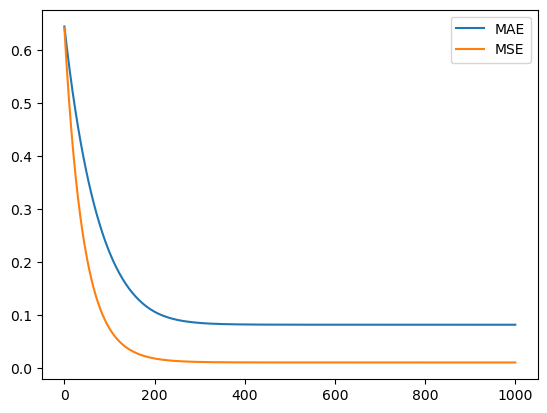

In [13]:
# Plot learning curve
plt.plot(info["e_mae_list"], label="MAE")
plt.plot(info["e_mse_list"], label="MSE")
plt.legend()

In [14]:
# load test data
print("\ntest: ", end="\t")
x_aug_test, y_test = load_csv_as_augmented(csv_test_path)


test: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (1500, 6), y.shape: (1500,)


In [15]:
# Load weights
weights_loaded=np.load(weights_file_path)
print(f"weights_loaded:\t{weights_loaded}")

weights_loaded:	[1.23126094 0.23047222 0.16414992 0.12036396 0.00306782 0.15102598]


In [16]:
# Testing
y_hat_train = multiple_linear_regression(x_aug_train, weights_loaded)
print(f"Error MAE on train: \t{fn_mae(y_hat_train,y_train):.4f}")
print(f"Error MSE on train: \t{fn_mse(y_hat_train,y_train):.4f}")
print(f"Error RMSE on train: \t{fn_rmse(y_hat_train,y_train):.4f}")
print(f"Error R2 on train: \t{fn_r2(y_hat_train,y_train):.4f}")
print()
y_hat_test = multiple_linear_regression(x_aug_test, weights_loaded)
print(f"Error MAE on test: \t{fn_mae(y_hat_test,y_test):.4f}")
print(f"Error MSE on test: \t{fn_mse(y_hat_test,y_test):.4f}")
print(f"Error RMSE on test: \t{fn_rmse(y_hat_test,y_test):.4f}")
print(f"Error R2 on test: \t{fn_r2(y_hat_test,y_test):.4f}")

Error MAE on train: 	0.0815
Error MSE on train: 	0.0103
Error RMSE on train: 	0.1014
Error R2 on train: 	0.9193

Error MAE on test: 	0.0811
Error MSE on test: 	0.0101
Error RMSE on test: 	0.1003
Error R2 on test: 	0.9147


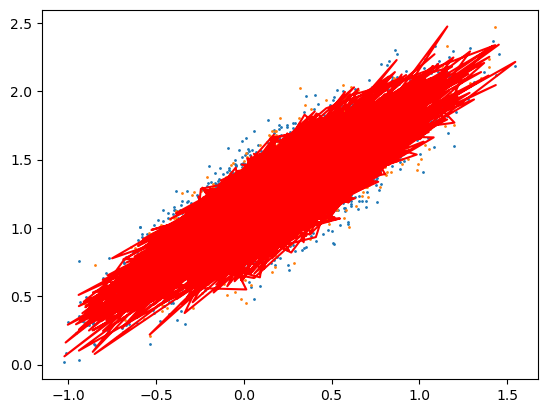

In [17]:
# Visualize using mean of data
# Best result on simple data
simple_x_train = np.mean(x_aug_train, axis=1)
simple_x_test = np.mean(x_aug_test, axis=1)
plt.scatter(simple_x_train, y_train, s=1)
plt.scatter(simple_x_test, y_test, s=1)

x_aug_total = np.vstack((x_aug_train, x_aug_test))
simple_x_total = np.mean(x_aug_total, axis=1)
y_hat_total = multiple_linear_regression(x_aug_total, weights_loaded)

plt.plot(simple_x_total, y_hat_total, c="red")